In [1]:
# Import Numpy and Matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

# Other Imports
import random
import pandas as pd
import statistics
import math
import time

# Scipy
from scipy import optimize, stats

# Astropy
from astropy.timeseries import LombScargle

from scipy.fft import fft

from operator import itemgetter

import pickle
from matplotlib.patches import Rectangle

In [2]:
# Universal Graph Styling
COLOR = 'k'
plt.style.use(['default'])
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
with open("centroids.txt", "rb") as fc:
    cents = pickle.load(fc)
    
with open("freqs.txt", "rb") as ff:
    freqs = pickle.load(ff)
    
with open("pwrs.txt", "rb") as fp:
    pwrs = pickle.load(fp)

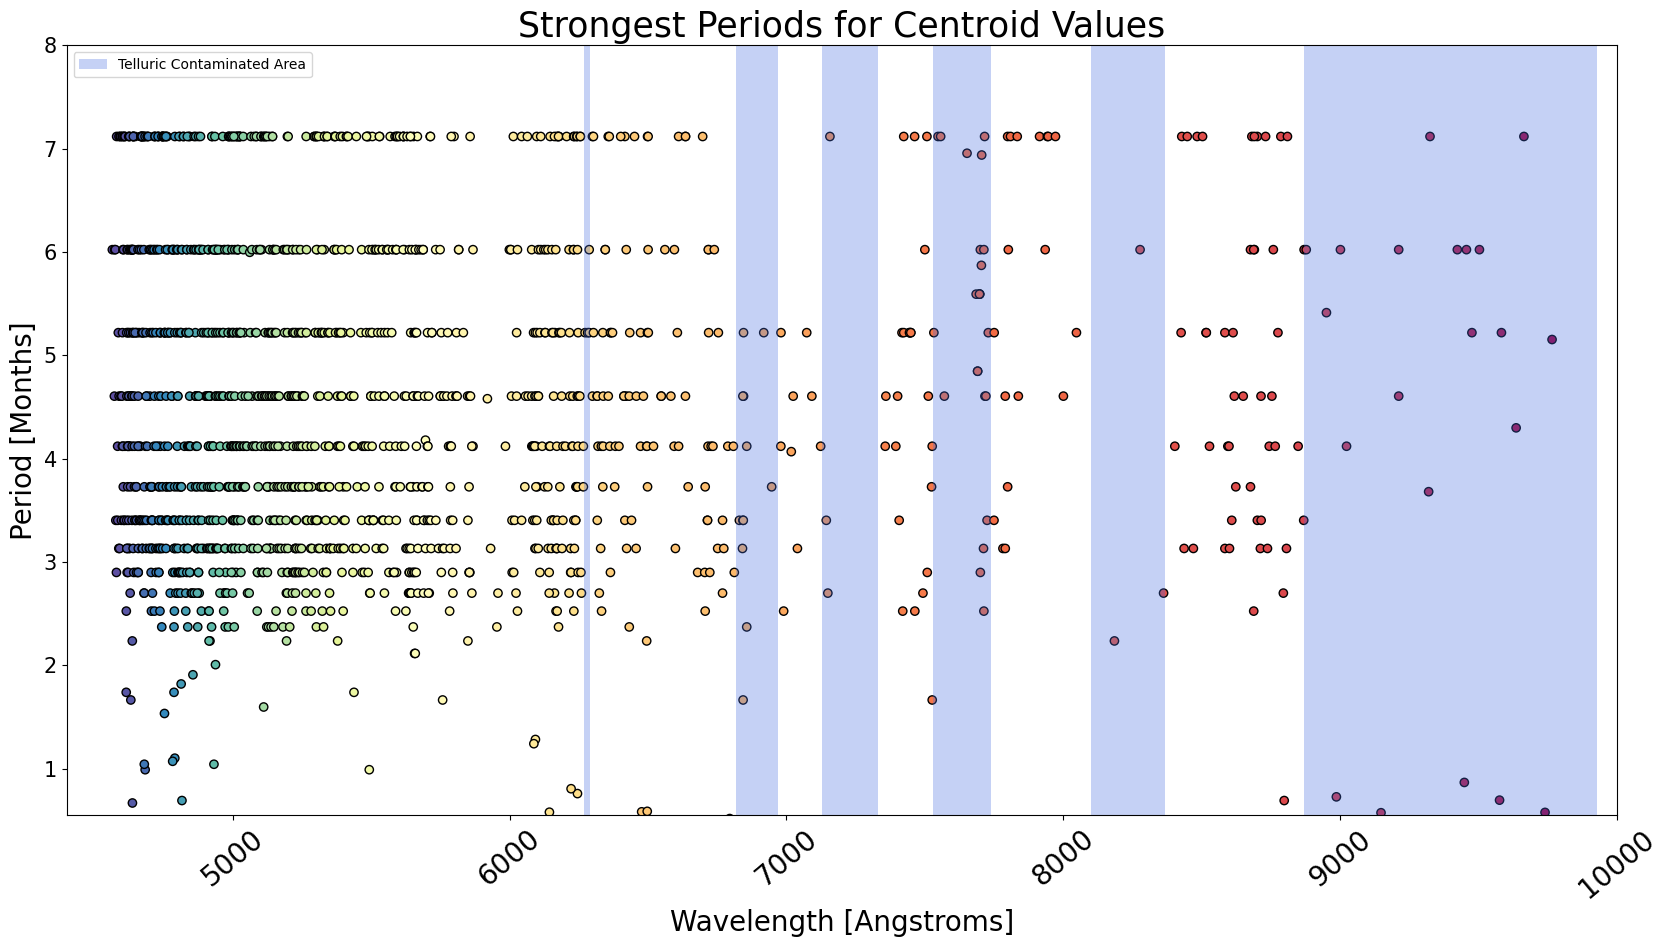

In [39]:
periods = []
for n in freqs:
    periods.append(((1000000000 / n) / 30.4) / 86400)

# Grabbing Text File Data
pre_centroids = np.array([x.split(' ')[0] for x in open("G2_espresso.txt").readlines()])
pre_depths = list(np.array([x.split(' ')[1] for x in open("G2_espresso.txt").readlines()]))
pre_depths = [item.replace("\n", "") for item in pre_depths]  

# Prepare Text Values for Plotting
txt_centroids = []
txt_depths = []
for x in pre_centroids:
    txt_centroids.append(float(x))
for x in pre_depths:
    txt_depths.append(float(x))

cents = [float(x) for x in cents]
# Plot Overlapped Results 
plt.figure(figsize=(20,10))
cm, z = plt.cm.get_cmap('Spectral_r'), range(np.shape(cents)[0])
plt.scatter(cents, periods, c=z, cmap=cm, edgecolors='black')
plt.title('Strongest Periods for Centroid Values', fontsize=25)
plt.xlabel('Wavelength [Angstroms]', fontsize=20)
plt.ylabel('Period [Months]', fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.ylim(0.55,8)
plt.xlim(4400,10000)
plt.yticks(fontsize=15)

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((6270, 0), 20, 10, facecolor="royalblue", alpha=0.3))
currentAxis.add_patch(Rectangle((6820, 0), 150, 10, facecolor="royalblue", alpha=0.3))
currentAxis.add_patch(Rectangle((7130, 0), 200, 10, facecolor="royalblue", alpha=0.3))
currentAxis.add_patch(Rectangle((7530, 0), 210, 10, facecolor="royalblue", alpha=0.3))
currentAxis.add_patch(Rectangle((8100, 0), 270, 10, facecolor="royalblue", alpha=0.3))
currentAxis.add_patch(Rectangle((8870, 0), 1060, 10, facecolor="royalblue", alpha=0.3, label='Telluric Contaminated Area'))
plt.legend()

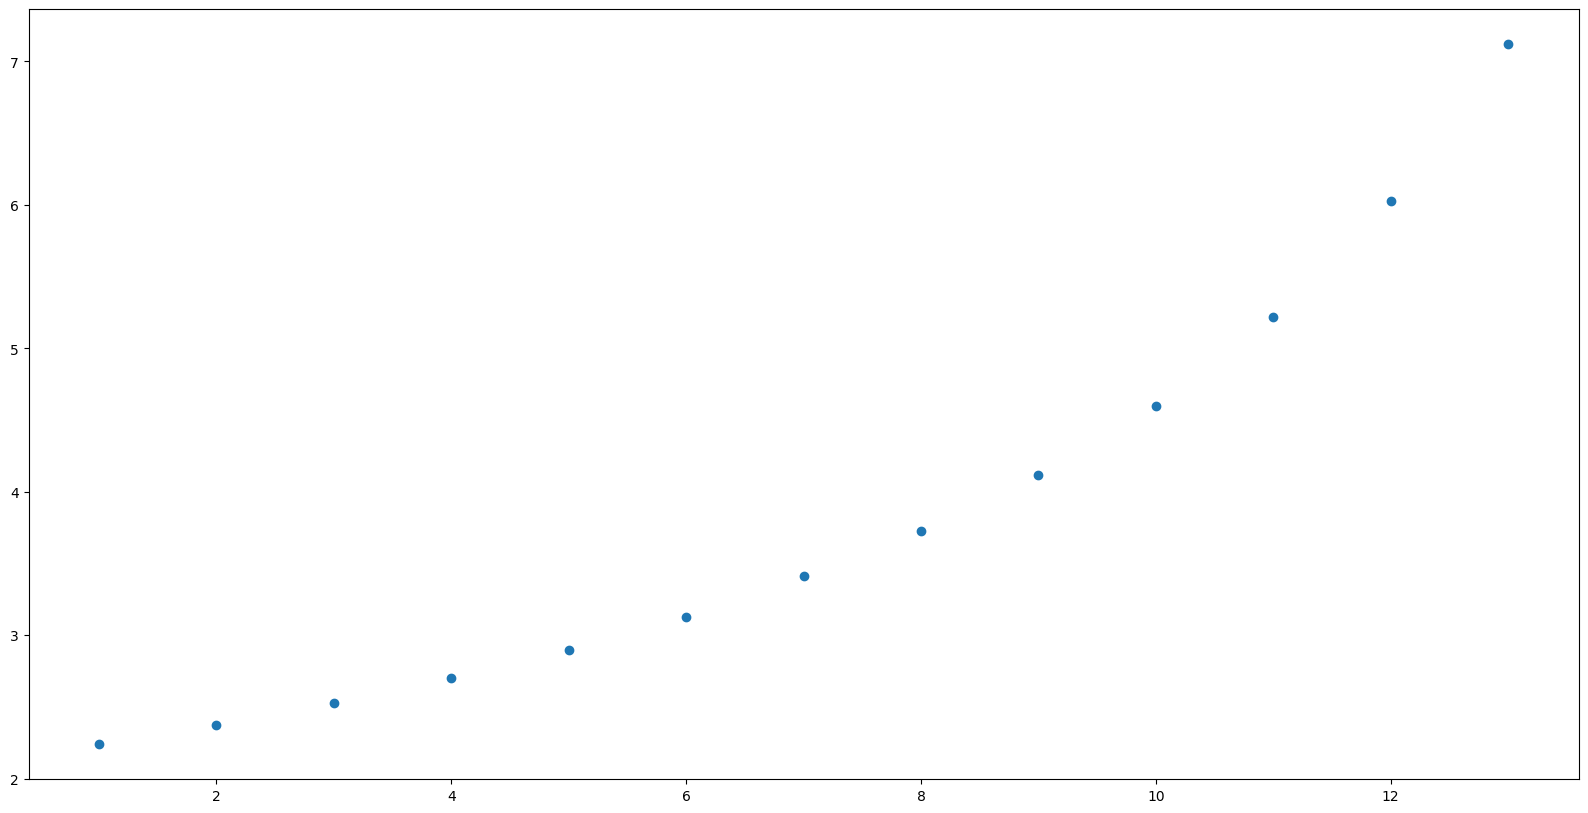

In [43]:
y = [2.24, 2.375, 2.525, 2.7, 2.9, 3.127, 3.41, 3.727, 4.12, 4.6, 5.22, 6.025, 7.12]
x = list(range(1,len(y)+1))

plt.figure(figsize=(20,10))
plt.scatter(x,y)

In [45]:
x1 = np.array(x)
y1 = np.array(y)
n = np.polyfit(x1, np.log(y1), 1, w=np.sqrt(y1))
print(n) # y ≈ exp(0.59669271) * exp(0.09818256 * x) ≈ 1.82e^(0.1x)

[0.09818256 0.59669271]


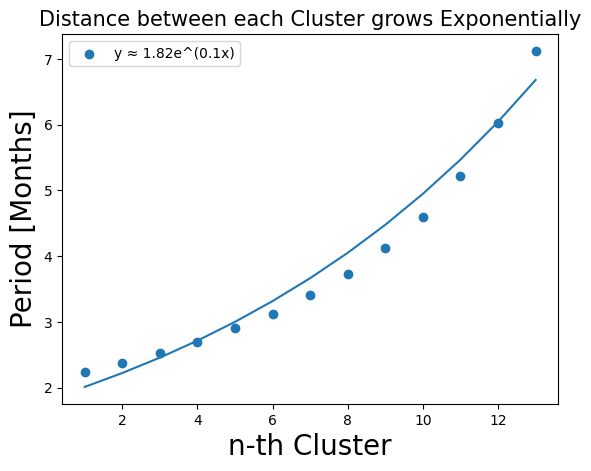

In [55]:
from math import e
j = 1.82*e**(0.1*x1)
plt.plot(x1,j)
plt.scatter(x,y, label='y ≈ 1.82e^(0.1x)')
plt.title('Distance between each Cluster grows Exponentially', fontsize=15)
plt.xlabel('n-th Cluster', fontsize=20)
plt.ylabel('Period [Months]', fontsize=20)
plt.legend()